<a href="https://colab.research.google.com/github/lalitha-sahitya/Traffic-Prediction/blob/main/traffic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
import pandas as pd
import numpy as np
od.download('https://www.kaggle.com/datasets/hasibullahaman/traffic-prediction-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahityapalacharla
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/hasibullahaman/traffic-prediction-dataset


100%|██████████| 83.1k/83.1k [00:00<00:00, 43.9MB/s]

In [4]:
os.listdir('traffic-prediction-dataset')

['TrafficTwoMonth.csv', 'Traffic.csv']

In [30]:
data=pd.read_csv('/content/traffic-prediction-dataset/TrafficTwoMonth.csv')
data

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal
...,...,...,...,...,...,...,...,...,...
5947,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
5948,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
5949,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
5950,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

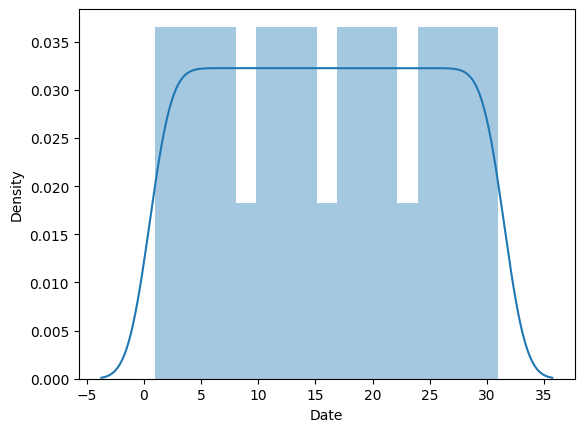

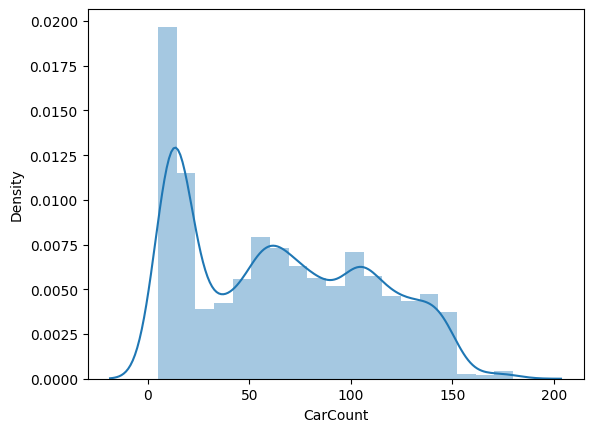

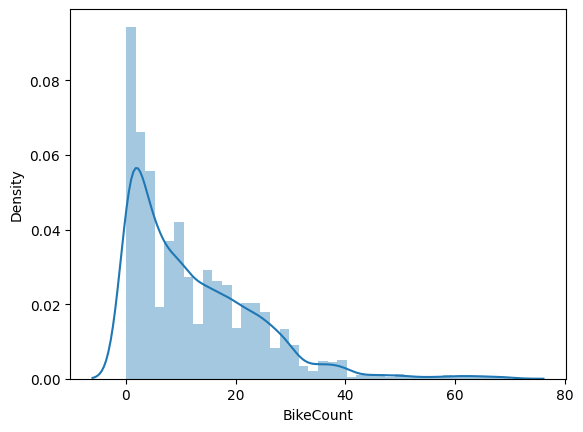

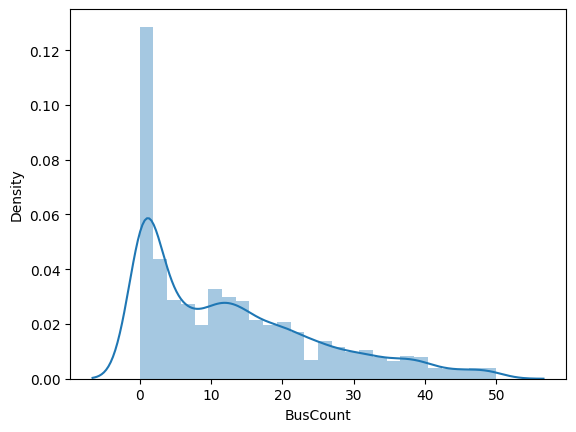

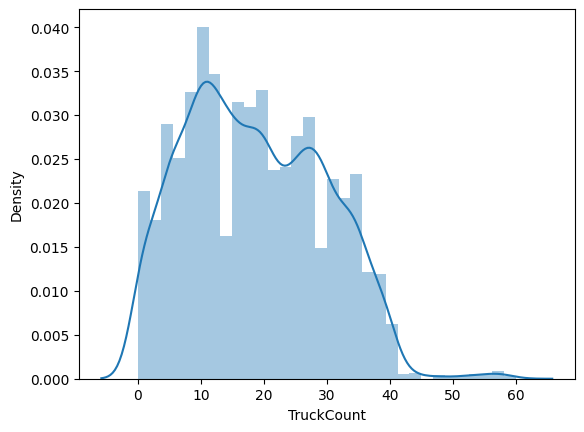

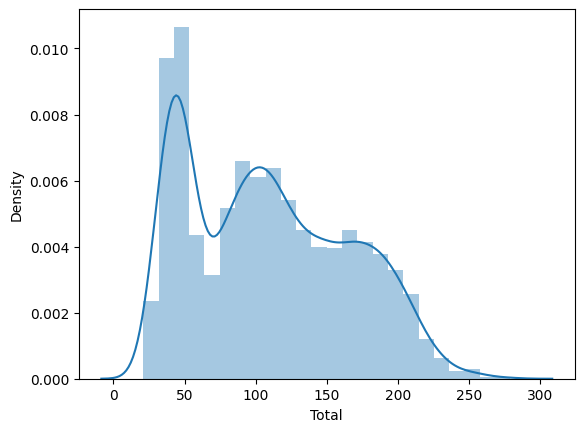

In [33]:
for i in data.select_dtypes(include='number').columns:
  sns.distplot(data[i])
  plt.show()

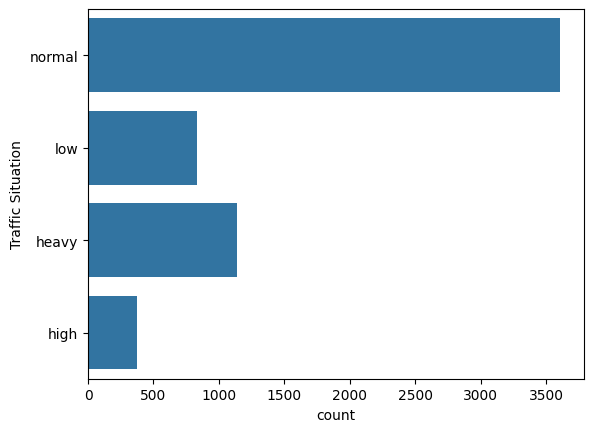

In [34]:
sns.countplot(data['Traffic Situation'])
plt.show()

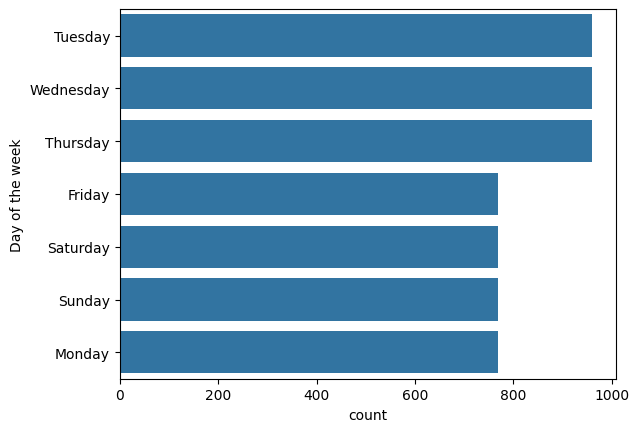

In [35]:
sns.countplot(data['Day of the week'])
plt.show()

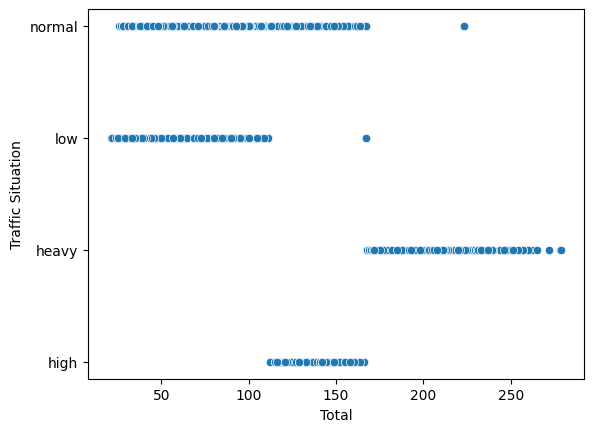

In [36]:
sns.scatterplot(x='Total',y='Traffic Situation',data=data)
plt.show()

In [37]:
data['Time'] = pd.to_datetime(data['Time'])

In [38]:
data.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,2025-02-20 00:00:00,10,Tuesday,13,2,2,24,41,normal
1,2025-02-20 00:15:00,10,Tuesday,14,1,1,36,52,normal
2,2025-02-20 00:30:00,10,Tuesday,10,2,2,32,46,normal
3,2025-02-20 00:45:00,10,Tuesday,10,2,2,36,50,normal
4,2025-02-20 01:00:00,10,Tuesday,11,2,1,34,48,normal


In [39]:
data['Hour']=data['Time'].dt.hour

In [40]:
data['Minute']=data['Time'].dt.minute

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Time               5952 non-null   datetime64[ns]
 1   Date               5952 non-null   int64         
 2   Day of the week    5952 non-null   object        
 3   CarCount           5952 non-null   int64         
 4   BikeCount          5952 non-null   int64         
 5   BusCount           5952 non-null   int64         
 6   TruckCount         5952 non-null   int64         
 7   Total              5952 non-null   int64         
 8   Traffic Situation  5952 non-null   object        
 9   Hour               5952 non-null   int32         
 10  Minute             5952 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(6), object(2)
memory usage: 465.1+ KB


In [42]:
data=data.drop('Time',axis=1)

In [43]:
x=data.drop('Traffic Situation',axis=1)
y=data['Traffic Situation']

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [45]:
x_train.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Hour,Minute
1705,27,Friday,69,8,0,15,92,18,15
2549,5,Sunday,22,7,8,27,64,13,15
295,13,Friday,5,2,2,36,45,1,45
4172,22,Saturday,36,8,3,29,76,11,0
2285,2,Thursday,59,18,8,24,109,19,15


In [46]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4761 entries, 1705 to 2732
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             4761 non-null   int64 
 1   Day of the week  4761 non-null   object
 2   CarCount         4761 non-null   int64 
 3   BikeCount        4761 non-null   int64 
 4   BusCount         4761 non-null   int64 
 5   TruckCount       4761 non-null   int64 
 6   Total            4761 non-null   int64 
 7   Hour             4761 non-null   int32 
 8   Minute           4761 non-null   int32 
dtypes: int32(2), int64(6), object(1)
memory usage: 334.8+ KB


In [47]:
y_train.head()

,Traffic Situation
1705,low
2549,normal
295,normal
4172,normal
2285,normal


In [51]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [52]:
x_train['Day of the week']=enc.fit_transform(x_train['Day of the week'])
x_test['Day of the week']=enc.transform(x_test['Day of the week'])

In [53]:
x_train

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Hour,Minute
1705,27,0,69,8,0,15,92,18,15
2549,5,3,22,7,8,27,64,13,15
295,13,0,5,2,2,36,45,1,45
4172,22,2,36,8,3,29,76,11,0
2285,2,4,59,18,8,24,109,19,15
...,...,...,...,...,...,...,...,...,...
4931,30,1,139,10,50,2,201,8,45
3264,13,0,18,4,1,15,38,0,0
1653,27,0,42,7,2,47,98,5,15
2607,6,1,12,1,2,21,36,3,45


In [54]:
y_train=enc.fit_transform(y_train)
y_test=enc.transform(y_test)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [56]:
models=[LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier()]

In [57]:
for i in models:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(i,'accuracy is',accuracy_score(y_test,y_pred))

LogisticRegression() accuracy is 0.7758186397984886
RandomForestClassifier() accuracy is 0.9966414777497901
KNeighborsClassifier() accuracy is 0.926112510495382
SVC() accuracy is 0.9269521410579346
DecisionTreeClassifier() accuracy is 0.9974811083123426


In [59]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [60]:
preds=model.predict(x_test)

In [67]:
preds

1191

In [62]:
accuracy_score(y_test,preds)

0.9974811083123426

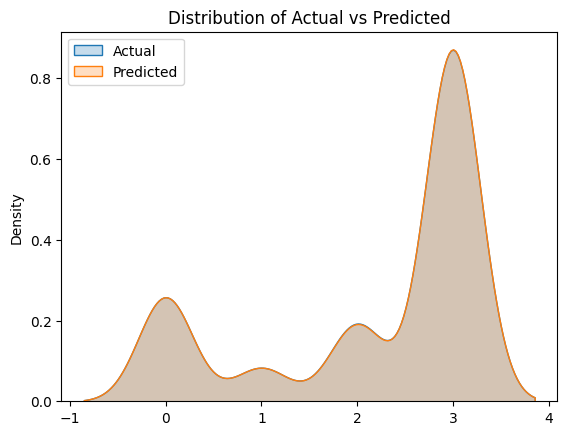

In [84]:
sns.kdeplot(y_test, label='Actual', shade=True)
sns.kdeplot(preds, label='Predicted', shade=True)
plt.title('Distribution of Actual vs Predicted')
plt.legend()
plt.show()
